In [1]:
plt.style.use('bmh')
# plt.style.use('ggplot')
# plt.style.use('seaborn')
# plt.style.use('default')
# plt.style.use('fivethirtyeight')

### Roof description

#### 1. Read datasets

In [2]:
# Read clean dataset
feats = [
    'Property_UPRN',
    'Current energy efficiency rating',
    'Total current energy costs over 3 years (£)',
    'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)'
]
df0 = pd.read_csv('data/data_clean.csv')[feats]
# create rating
df0['CO2_rating'] = pd.qcut(df0[feats[-1]], q = 5, labels = range(1,6)).astype(int)
df0['CO2_rating'] = 6 - df0.CO2_rating
display(df0.CO2_rating.value_counts().sort_index())

1    36938
2    34265
3    37728
4    37016
5    39092
Name: CO2_rating, dtype: int64

In [3]:
# read preprocessed dataset
df1 = pd.read_csv('data/descriptions/ROOF_DESCRIPTION.csv', sep = '|')
# ratings convertion and merge with initial dataset
dict_repl1 = {
    'very poor': 1,
    'poor': 2,
    'average': 3,
    'good': 4,
    'very good': 5,
}
df1['Roof_rating'] = df1['ROOF_ENERGY_EFF'].str.lower().map(dict_repl1)
df1 = df1.merge(df0, on = 'Property_UPRN', how = 'left')
df1['Total_rating'] = (df1.Roof_rating + df1.CO2_rating)/2
print(df1.shape)
display(df1.Total_rating.value_counts().sort_index())

(163285, 9)


1.00    15684
1.50    10840
2.00     9211
2.50    18493
3.00    23192
3.50    24861
4.00    24309
4.50    17780
5.00    17867
Name: Total_rating, dtype: int64

#### 2. Data cleaning

In [4]:
l = 'Average thermal transmittance '
df1['ATT'] = df1.ROOF_DESCRIPTION.map(lambda x: float(x[len(l):].split(' ')[0]) if x.startswith(l) else np.nan)

In [5]:
# df1.ATT.value_counts()

In [6]:
# df1.describe(include = 'all')

(0.049, 0.11]    8396
(0.12, 0.15]     8371
(0.11, 0.12]     1042
(0.15, 1.22]      232
Name: ATT_rating, dtype: int64

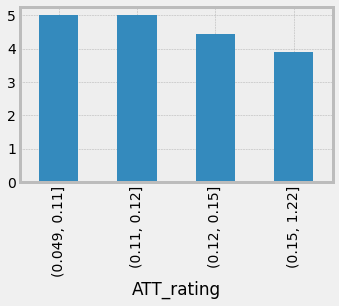

In [7]:
# dependancy of ATT ROOF_ENERGY_EFF - we can see that when this field have been filled then in most number of cases rating = 5
df1['ATT_rating'] = pd.qcut(df1.ATT, q = 4)
display(df1.ATT_rating.value_counts())
_ = df1.groupby('ATT_rating')['Roof_rating'].mean().plot(kind = 'bar', figsize = (5,3))

In [8]:
df1['ROOF_TYPE'] = df1.ROOF_DESCRIPTION.map(lambda x: x.split(',')[0].strip() if not x.startswith(l) else np.nan)
df1['ROOF_INS']  = df1.ROOF_DESCRIPTION.map(lambda x: x.split(',')[-1].strip() if not x.startswith(l) else np.nan)

In [9]:
df1.ROOF_TYPE.value_counts().to_dict()

{'Pitched': 116786,
 'Roof room(s)': 19250,
 'Flat': 8141,
 '(another dwelling above)': 1051,
 'Thatched': 16}

In [10]:
df1.ROOF_INS.value_counts().to_dict()

{'300 mm loft insulation': 20685,
 '200 mm loft insulation': 18741,
 'no insulation (assumed)': 18498,
 '250 mm loft insulation': 14502,
 'insulated (assumed)': 14433,
 '150 mm loft insulation': 11319,
 '270 mm loft insulation': 10282,
 '100 mm loft insulation': 9121,
 'limited insulation (assumed)': 7443,
 'insulated': 4785,
 'ceiling insulated': 4785,
 '350 mm loft insulation': 2035,
 '50 mm loft insulation': 1737,
 'no insulation': 1706,
 '400+ mm loft insulation': 1375,
 '75 mm loft insulation': 1365,
 '(another dwelling above)': 1051,
 'insulated at rafters': 723,
 '25 mm loft insulation': 321,
 'limited insulation': 133,
 '12 mm loft insulation': 86,
 '400 mm loft insulation': 81,
 '0 mm loft insulation': 13,
 'with additional insulation': 11,
 'Thatched': 5,
 '*** INVALID INPUT Code : 57 *** loft insulation': 4,
 '400+  mm loft insulation': 2,
 'thatched': 1,
 'Flat': 1}

In [11]:
# replacing
dict_repl = {
 'Pitched': 'Pitched',
 'Roof room(s)': 'Roof room(s)',
 'Flat': 'Flat',
 '(another dwelling above)': 'Other',
 'Thatched': 'Other'
}
df1['ROOF_TYPE'] = df1.ROOF_TYPE.map(dict_repl)

In [12]:
df1.ROOF_TYPE.value_counts()

Pitched         116786
Roof room(s)     19250
Flat              8141
Other             1067
Name: ROOF_TYPE, dtype: int64

In [13]:
# replacing
dict_repl = {
 '300 mm loft insulation': 300,
 '200 mm loft insulation': 200,
 'no insulation (assumed)': 0,
 '250 mm loft insulation': 250,
 'insulated (assumed)': 1,
 '150 mm loft insulation': 150,
 '270 mm loft insulation': 270,
 '100 mm loft insulation': 100,
 'limited insulation (assumed)': 1,
 'insulated': 1,
 'ceiling insulated': 1,
 '350 mm loft insulation': 350,
 '50 mm loft insulation': 50,
 'no insulation': 0,
 '400+ mm loft insulation': 400,
 '75 mm loft insulation': 75,
 '(another dwelling above)': np.nan,
 'insulated at rafters': 1,
 '25 mm loft insulation': 25,
 'limited insulation': 1,
 '12 mm loft insulation': 12,
 '400 mm loft insulation': 400,
 '0 mm loft insulation': 0,
 'with additional insulation': 1,
 'Thatched': np.nan,
 '*** INVALID INPUT Code : 57 *** loft insulation': np.nan,
 '400+  mm loft insulation': 400,
 'thatched': np.nan,
 'Flat': np.nan
}
df1['ROOF_INS'] = df1.ROOF_INS.map(dict_repl)

In [14]:
df1.ROOF_INS.value_counts()

1.00      32313
300.00    20685
0.00      20217
200.00    18741
250.00    14502
150.00    11319
270.00    10282
100.00     9121
350.00     2035
50.00      1737
400.00     1458
75.00      1365
25.00       321
12.00        86
Name: ROOF_INS, dtype: int64

#### 3. Ratings vizualisation

In [15]:
feats_gr = ['ROOF_TYPE', 'ROOF_INS'][::-1]
feats_ag = ['Roof_rating', 'CO2_rating', 'Total_rating']
colors_list = ['red','orange','green']

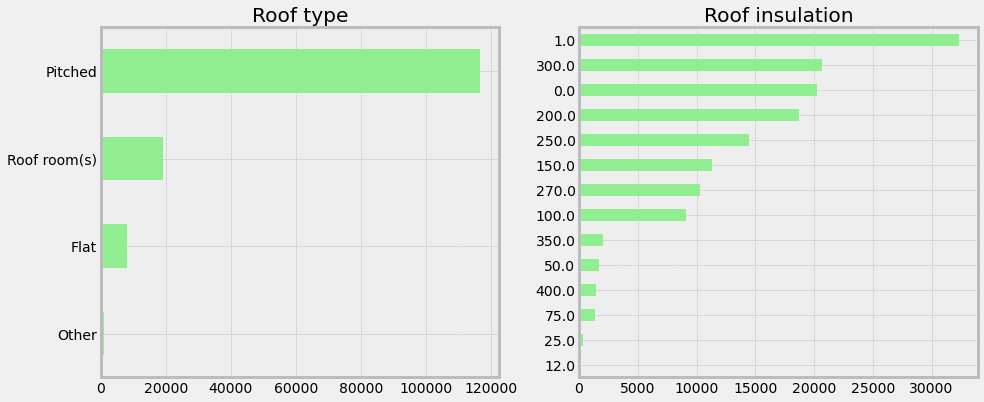

In [16]:
# popularity by wall types and insulation
_, ax = plt.subplots(1,2, figsize = (14,6))
_ = df1.groupby(feats_gr[1]).size().sort_values().plot(kind = 'barh', ax = ax[0], ylabel = '', color = 'lightgreen', title = 'Roof type')
_ = df1.groupby(feats_gr[0]).size().sort_values().plot(kind = 'barh', ax = ax[1], ylabel = '', color = 'lightgreen', title = 'Roof insulation')

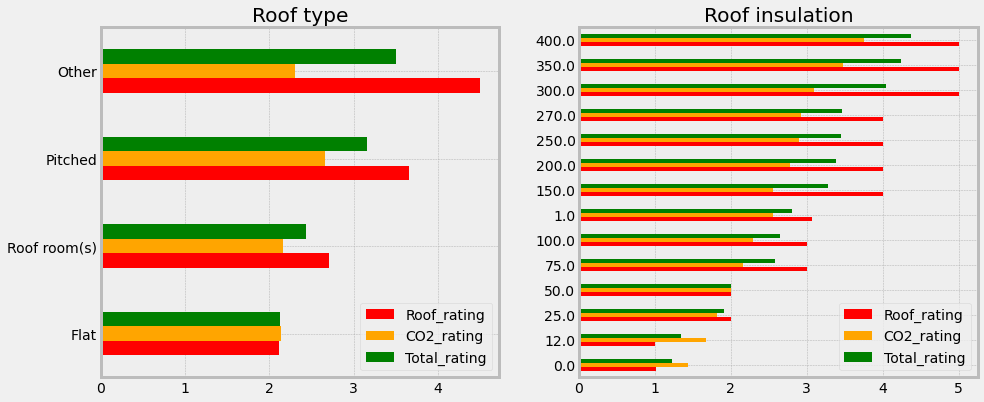

In [17]:
# ratings by wall types and insulation
_, ax = plt.subplots(1,2, figsize = (14,6))
_ = df1.groupby(feats_gr[1])[feats_ag].mean().sort_values('Total_rating').plot(kind = 'barh', ax = ax[0], ylabel = '', color = colors_list, title = 'Roof type')
_ = df1.groupby(feats_gr[0])[feats_ag].mean().sort_values('Total_rating').plot(kind = 'barh', ax = ax[1], ylabel = '', color = colors_list, title = 'Roof insulation')

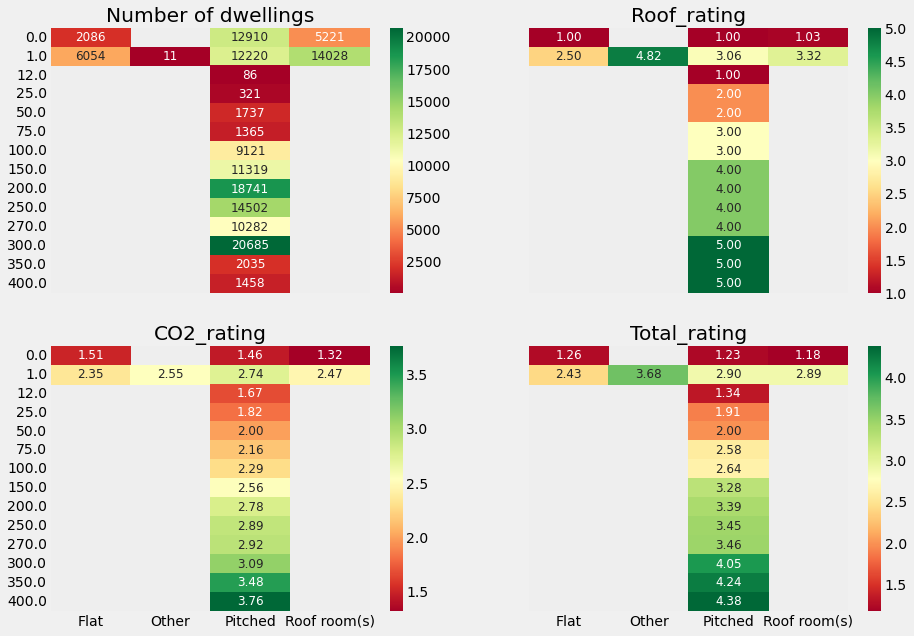

In [18]:
# heatmaps
_, ax = plt.subplots(2,2, figsize = (14,10))

df_corr = df1.groupby(feats_gr).size().unstack()
p = sns.heatmap(df_corr, ax = ax[0][0], cmap = 'RdYlGn', annot = True, fmt = '.0f', annot_kws={"size": 12})
_ = p.set_xlabel('')
_ = p.set_ylabel('')
_ = p.set_title('Number of dwellings')
_ = p.set_xticklabels('')

k = 0
df_corr = df1.groupby(feats_gr)[feats_ag[k]].mean().unstack()
p = sns.heatmap(df_corr, ax = ax[0][1], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 12})
_ = p.set_xlabel('')
_ = p.set_yticklabels('')
_ = p.set_xticklabels('')
_ = p.set_ylabel('')
_ = p.set_title(feats_ag[k])

k = 1
df_corr = df1.groupby(feats_gr)[feats_ag[k]].mean().unstack()
p = sns.heatmap(df_corr, ax = ax[1][0], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 12})
_ = p.set_xlabel('')
_ = p.set_ylabel('')
_ = p.set_title(feats_ag[k])

k = 2
df_corr = df1.groupby(feats_gr)[feats_ag[k]].mean().unstack()
p = sns.heatmap(df_corr, ax = ax[1][1], cmap = 'RdYlGn', annot = True, fmt = '.2f', annot_kws={"size": 12})
_ = p.set_xlabel('')
_ = p.set_yticklabels('')
_ = p.set_ylabel('')
_ = p.set_title(feats_ag[k])

#### 4. Correlations algorithm
- Create a splittings by the unique combinations of cleaned features values. Wall description and wall energy efficiency in our case have transformed into 3 features: WALL_TYPE, WALL_INS, Wall_rating. Collect CO2 emissions current per floor area values in each group.
- If in one of the group we have less then 100 observations let's replace them as OTHER.
- Plot box-plot to have ability to vizual compare distributions of CO2 values in each group.
- Conduct ANOVA statistical test to have numerical value of similarity between these variables.

In [19]:
# 1) create splittings
feats_gr = [
    'ROOF_TYPE', 
    'ROOF_INS',
    'Roof_rating'
]
feats_ag = [
    'Current energy efficiency rating',
    'Total current energy costs over 3 years (£)',
    'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)'
]
           
df2 = df1.groupby(feats_gr)[feats_ag[-1]].agg([len,np.mean]).reset_index()
df2['group_name'] = df2[feats_gr].apply(lambda x: '_'.join([str(x1) for x1 in x]), axis = 1)
df2.loc[df2['len'] < 100, 'group_name'] = '_OTHER'
del df2['len']
del df2['mean']
print(df2.shape)

# merge with initial dataset
df1 = df1.merge(df2, how = 'left', on = feats_gr)

(36, 4)


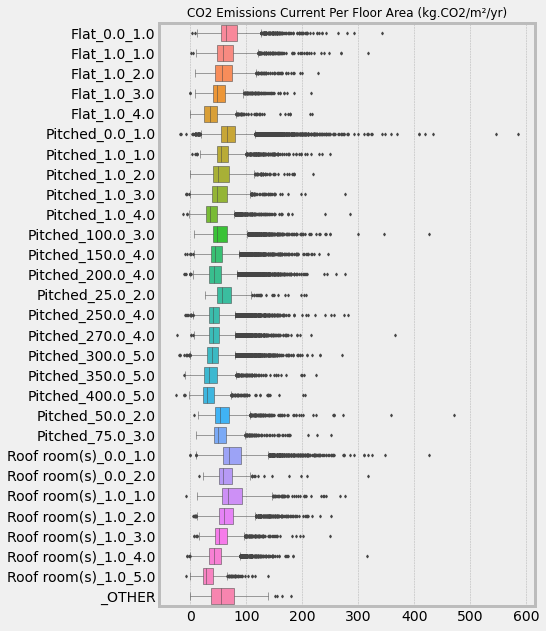

In [20]:
# 2) Plot boxplot to visually compare distributions
list_groups = sorted(df1[~df1.group_name.isnull()].group_name.unique())
feat = feats_ag[-1]
_, ax = plt.subplots(1,1, figsize = (6,10))
p = sns.boxplot(y=df1.group_name, x=df1[feat], ax = ax, order = list_groups, linewidth=0.5, saturation=1, fliersize = 2)
_ = p.set_title(feat, fontsize = 12)
_ = p.set_ylabel('')
_ = p.set_xlabel('')

In [21]:
# 3) Conduct ANOVA statistical test to have numerical value of similarity between these variables.
from scipy import stats
data = df1.groupby('group_name')[feat].agg(lambda x: list(x))
fvalue, pvalue = stats.f_oneway(*data)
fvalue, pvalue

(1153.0926234253066, 0.0)

#### 5. Feature engineering
- Calculate average values of features Current energy efficiency rating and Total current energy costs over 3 years (£) by the groups that described above.
- Calculate average of feature rating (if exists, or CO2 rating otherwise).
- Create new features on the Property_UPRN level and replace the categorical features by that 3 new numerical features.
- We will use that features in the modelling and recommendation parts.

In [22]:
# Calculate average values of features Current energy efficiency rating and Total current energy costs over 3 years (£) by the groups.
pre = 'Roof_'
df2 = df1.groupby(feats_gr)[feats_ag[:-1]].agg([len, np.mean])
df2.columns = [pre+'eff_len',pre+'eff_mean',pre+'cost_len',pre+'cost_mean']
df2.reset_index(inplace = True)
df2['group_name'] = df2[feats_gr].apply(lambda x: '_'.join([str(x1) for x1 in x]), axis = 1)
df2.loc[df2[pre+'eff_len'] < 100, 'group_name'] = '_OTHER'
del df2[pre+'eff_len']
del df2[pre+'cost_len']

In [23]:
# Create new features on the Property_UPRN level and replace the categorical features by that new numericals
df2 = df2.groupby('group_name')[pre+'eff_mean',pre+'cost_mean'].mean().reset_index()
df1 = df1.merge(df2)
df3 = df1.groupby('Property_UPRN')[pre+'eff_mean',pre+'cost_mean'].mean().reset_index()

In [24]:
# Add average feature rating
df4 = df1.groupby('Property_UPRN')[pre+'rating'].mean().reset_index()
df3 = df3.merge(df4)
print(df3.shape)
df3[:3]

(115828, 4)


,Property_UPRN,Roof_eff_mean,Roof_cost_mean,Roof_rating
0,1000001648,67.72,"2,933.99",4.00
1,1000001652,67.72,"2,933.99",4.00
2,1000001686,51.47,"4,655.58",1.00


In [25]:
# We will use that features in the modelling part.
df3.to_csv('data/features/ROOF_DESCRIPTION.csv', index = False, encoding = 'utf8', sep = '|')